# Analyzing Public Sentiment on Twitter: A Web Intelligence Project on ChatGPT

In [1]:
import twitter
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt

In [2]:
consumer_key = "U8SYEd1WDqBkwKdm684LbkhrS" 
consumer_secret = "RiXKMWx7lFQi4lIKJn6sigYGHoFKlaFYjmGNKjON5YHsepOvQV"
access_token = "713940234-nWTGlhRn1TK0U3udvDiM0HopUkCuUX3QnibIV1nN"
access_token_secret = "dM54ObQwOOmmrChdCXIuwmddbT1EeOq4JefsEsmZ9c251"

In [3]:
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove mentions
  text = re.sub(r'#', '', text) #Remove hashtags
  text = re.sub(r'RT[\s]+', '', text) #Remove retweets
  text = re.sub(r'https?:\/\/S+', '', text) #Remove hyperlinks
  text = re.sub(r'http?:\/\/S+', '', text) #Remove hyperlinks

  return text

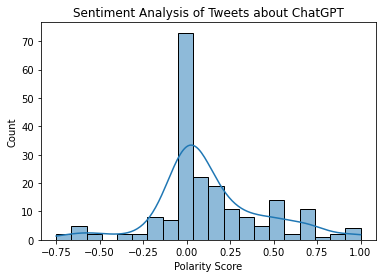

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
query='ChatGPT'
    # Search for tweets containing "chatgpt"
tweets = tweepy.Cursor(api.search_tweets, q=query, lang="en", tweet_mode="extended").items(200)
tweet_texts = []
cleaned_texts = []
for tweet in tweets:
    tweet_texts.append(tweet.full_text)
    cleaned_texts.append(cleanText(tweet.full_text))

# Store the cleaned text in a Pandas dataframe and export it to a CSV file
df = pd.DataFrame({'text': cleaned_texts})
df.to_csv('tweets.csv', index=False)

# Perform sentiment analysis on the cleaned text using TextBlob
polarity_scores = []
for text in cleaned_texts:
    blob = TextBlob(text)
    polarity_scores.append(blob.sentiment.polarity)

# Plot a histogram of the polarity scores
sns.histplot(data=polarity_scores, bins=20, kde=True)
plt.title('Sentiment Analysis of Tweets about ChatGPT')
plt.xlabel('Polarity Score')
plt.show()

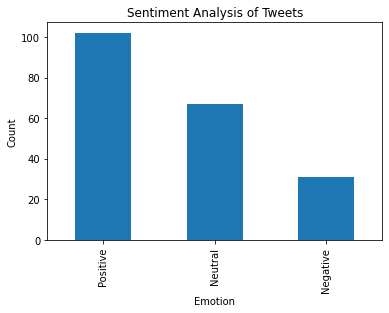

In [5]:
df = pd.read_csv('tweets.csv')

# Clean the text
df['text'] = df['text'].apply(cleanText)

# Import the TextBlob library for sentiment analysis
from textblob import TextBlob

# Define a function to get the sentiment polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Add a new column with the sentiment polarity
df['polarity'] = df['text'].apply(get_polarity)

# Define a function to get the sentiment emotion
def get_emotion(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Add a new column with the sentiment emotion
df['emotion'] = df['polarity'].apply(get_emotion)

# Get the count of each emotion
emotion_count = df['emotion'].value_counts()

# Plot a bar graph of the emotion count
emotion_count.plot(kind='bar')

# Set the title and axis labels
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Show the graph
plt.show()

C:\Users\teesh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\teesh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\teesh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9889 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\teesh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\teesh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 10003 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\teesh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128071 missing from

C:\Users\teesh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129327 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\teesh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\teesh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9889 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\teesh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\teesh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 10003 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\teesh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128071 missing from current f

C:\Users\teesh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128154 missing from current font.
  font.set_text(s, 0, flags=flags)


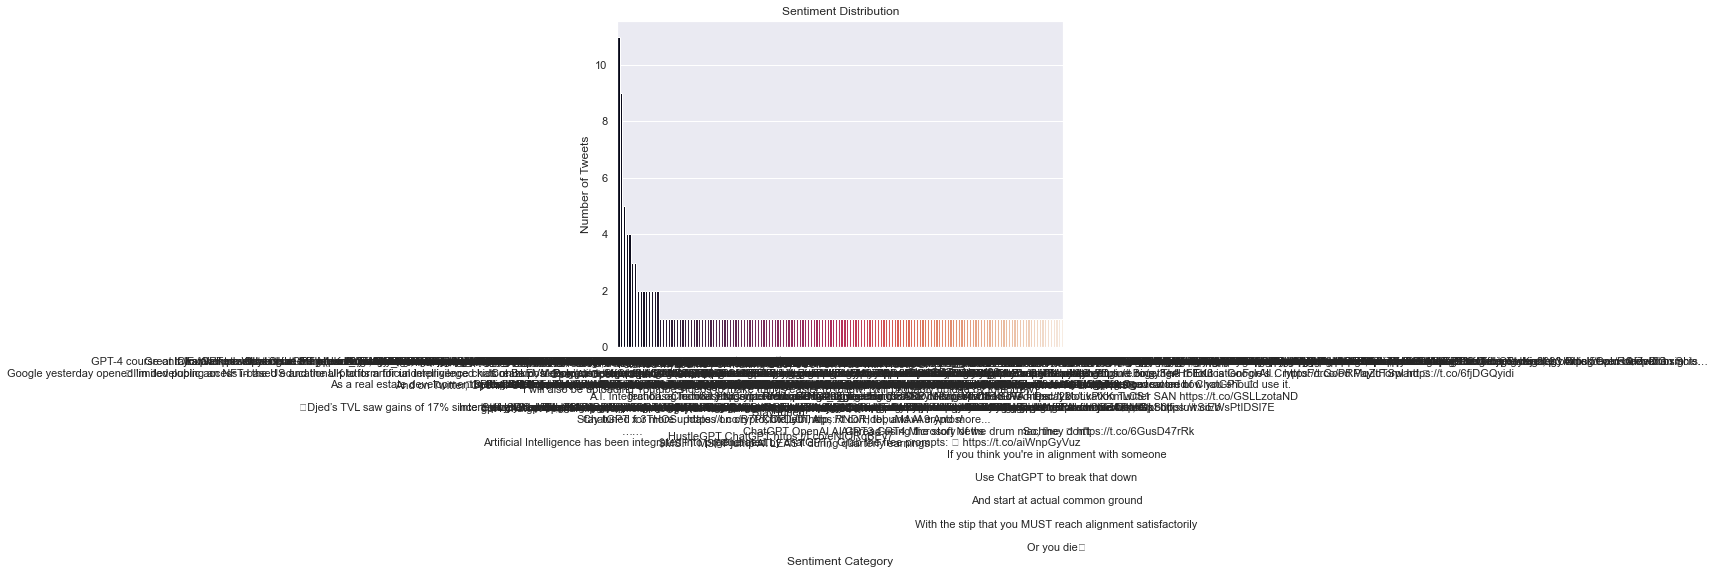

In [6]:
sentiment_counts = df['text'].value_counts()

# Plot the sentiment distribution as a bar chart
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="rocket")
ax.set_title("Sentiment Distribution")
ax.set_ylabel("Number of Tweets")
ax.set_xlabel("Sentiment Category")

# Show the plot
plt.show()

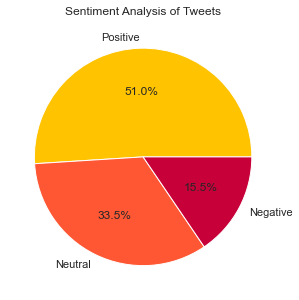

In [7]:
import matplotlib.pyplot as plt

# Get the count of each emotion
emotion_count = df['emotion'].value_counts()

# Set the figure size
plt.figure(figsize=(5, 5))

# Define the labels and colors for the pie chart
labels = emotion_count.index
colors = ['#FFC300', '#FF5733', '#C70039']

# Plot the pie chart
plt.pie(emotion_count, labels=labels, colors=colors, autopct='%1.1f%%')

# Set the title
plt.title('Sentiment Analysis of Tweets')

# Show the pie chart
plt.show()

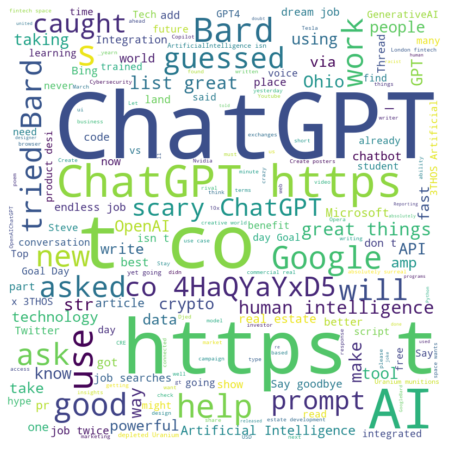

In [8]:
from wordcloud import WordCloud

# Convert the list of cleaned text to a single string
text = " ".join(cleaned_texts)

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()